Implement a feedforward network, and observe change in accuracy with different parameters

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import seaborn as sb
from sklearn.metrics import confusion_matrix

In [ ]:
digits= fetch_openml("mnist_784")

In [ ]:
X= digits.data
Y= digits.target
print("Shape of input data: ", X.shape)
print("Shape of target data: ", Y.shape)

Shape of input data:  (70000, 784)
Shape of target data:  (70000,)


<Figure size 432x288 with 0 Axes>

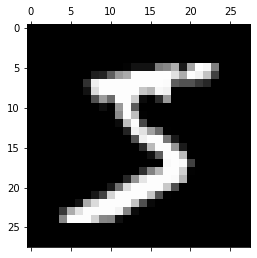

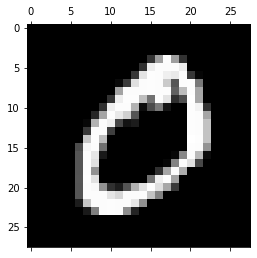

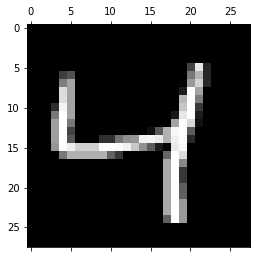

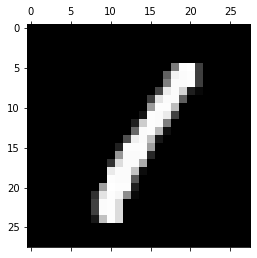

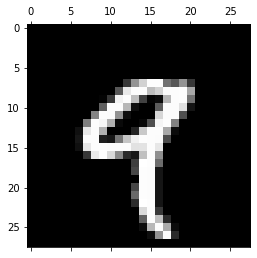

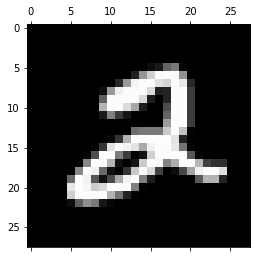

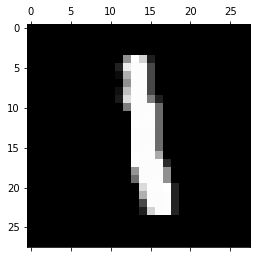

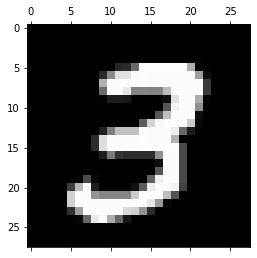

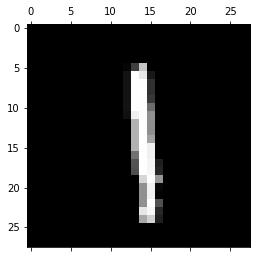

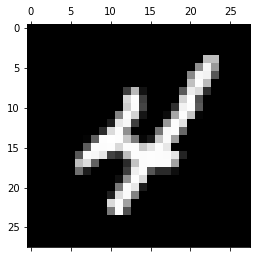

In [ ]:
X_res= X.values.reshape((70000, 28, 28))
plt.gray()
for i in range(10):
  plt.matshow(X_res[i])

# train:test = 70:30

In [ ]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, train_size=0.7)

In [ ]:
ss= StandardScaler()
X_train= ss.fit_transform(X_train)
X_test= ss.transform(X_test)

In [ ]:
mlp= MLPClassifier(hidden_layer_sizes= 64, max_iter=10)
mlp= mlp.fit(X_train, Y_train)
Y_pred= mlp.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
print("Accuracy: ", accuracy_score(Y_test, Y_pred))

Accuracy:  0.9648571428571429


In [ ]:
print("Report:\n", classification_report(Y_test, Y_pred))

Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2058
           1       0.98      0.98      0.98      2337
           2       0.96      0.96      0.96      2054
           3       0.96      0.95      0.95      2172
           4       0.97      0.95      0.96      1999
           5       0.95      0.97      0.96      1896
           6       0.98      0.97      0.98      2134
           7       0.96      0.97      0.97      2173
           8       0.95      0.95      0.95      2100
           9       0.95      0.96      0.95      2077

    accuracy                           0.96     21000
   macro avg       0.96      0.96      0.96     21000
weighted avg       0.96      0.96      0.96     21000



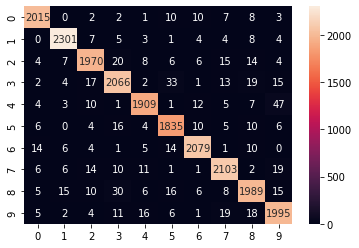

In [ ]:
cm= confusion_matrix(Y_test, Y_pred)
sb.heatmap(cm, fmt='d', annot=True)

# Different training sizes

In [ ]:
def test(train):
  X_train, X_test, Y_train, Y_test= train_test_split(X, Y, train_size=train)

  ss= StandardScaler()
  X_train= ss.fit_transform(X_train)
  X_test= ss.transform(X_test)

  mlp= MLPClassifier(hidden_layer_sizes=64, max_iter=10)
  mlp.fit(X_train, Y_train)
  Y_pred= mlp.predict(X_test)

  acc= accuracy_score(Y_test, Y_pred)
  print("Accuracy score for training size: ", train, " ", acc)
  print("Report for accuracy size: ", train, "\n", classification_report(Y_test, Y_pred))
  cm= confusion_matrix(Y_test, Y_pred)
  sb.heatmap(cm, fmt='d', annot=True)
  return acc

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Accuracy score for training size:  0.6   0.96375
Report for accuracy size:  0.6 
               precision    recall  f1-score   support

           0       0.98      0.97      0.97      2777
           1       0.98      0.98      0.98      3168
           2       0.96      0.96      0.96      2825
           3       0.96      0.96      0.96      2832
           4       0.95      0.97      0.96      2778
           5       0.96      0.95      0.95      2480
           6       0.96      0.98      0.97      2732
           7       0.97      0.96      0.97      2916
           8       0.95      0.95      0.95      2739
           9       0.97      0.95      0.96      2753

    accuracy                           0.96     28000
   macro avg       0.96      0.96      0.96     28000
weighted avg       0.96      0.96      0.96     28000



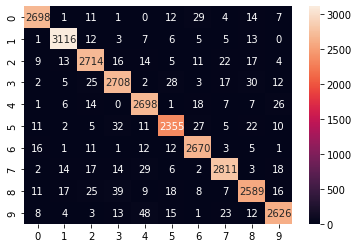

In [ ]:
acc= []

# 60% testing set
acc.append(test(0.6))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Accuracy score for training size:  0.75   0.9678285714285715
Report for accuracy size:  0.75 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1715
           1       0.98      0.99      0.98      1906
           2       0.96      0.97      0.97      1787
           3       0.95      0.96      0.96      1753
           4       0.96      0.97      0.97      1717
           5       0.94      0.96      0.95      1527
           6       0.98      0.98      0.98      1738
           7       0.97      0.97      0.97      1856
           8       0.96      0.95      0.96      1753
           9       0.97      0.95      0.96      1748

    accuracy                           0.97     17500
   macro avg       0.97      0.97      0.97     17500
weighted avg       0.97      0.97      0.97     17500



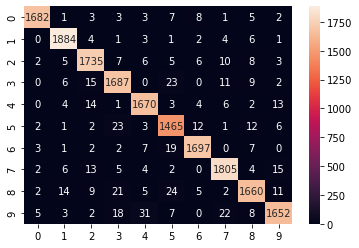

In [ ]:
# 75% testing set
acc.append(test(0.75))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Accuracy score for training size:  0.8   0.967
Report for accuracy size:  0.8 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      1356
           1       0.98      0.99      0.98      1588
           2       0.97      0.96      0.97      1417
           3       0.97      0.95      0.96      1399
           4       0.97      0.96      0.97      1389
           5       0.96      0.95      0.96      1287
           6       0.97      0.97      0.97      1335
           7       0.96      0.97      0.97      1372
           8       0.95      0.95      0.95      1378
           9       0.95      0.97      0.96      1479

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



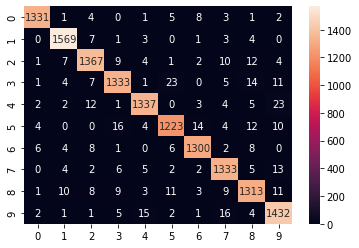

In [ ]:
# 80% testing set
acc.append(test(0.8))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Accuracy score for training size:  0.9   0.9711428571428572
Report for accuracy size:  0.9 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       674
           1       0.99      0.99      0.99       812
           2       0.96      0.96      0.96       722
           3       0.96      0.97      0.97       736
           4       0.98      0.97      0.97       666
           5       0.97      0.96      0.97       647
           6       0.98      0.98      0.98       661
           7       0.96      0.98      0.97       703
           8       0.97      0.96      0.96       692
           9       0.97      0.96      0.96       687

    accuracy                           0.97      7000
   macro avg       0.97      0.97      0.97      7000
weighted avg       0.97      0.97      0.97      7000



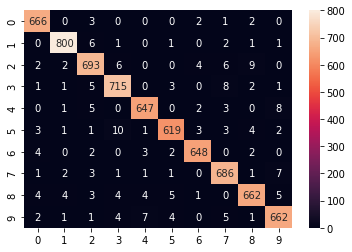

In [ ]:
# 90% testing set
acc.append(test(0.9))

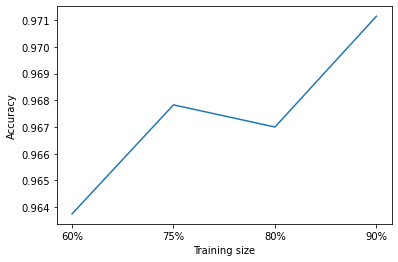

In [ ]:
X_axis= np.array(["60%", "75%", "80%", "90%"])
Y_axis= np.array(acc)

plt.plot(X_axis, Y_axis)
plt.xlabel("Training size")
plt.ylabel("Accuracy")
plt.show()

# Different model parameters

In [ ]:
def test(iters):
  X_train, X_test, Y_train, Y_test= train_test_split(X, Y, train_size=70)

  ss= StandardScaler()
  X_train= ss.fit_transform(X_train)
  X_test= ss.transform(X_test)

  mlp= MLPClassifier(hidden_layer_sizes=64, max_iter=iters)
  mlp.fit(X_train, Y_train)
  Y_pred= mlp.predict(X_test)

  acc= accuracy_score(Y_test, Y_pred)
  print("Accuracy score for", iters, "iterations: ", acc)
  print("Report for", iters, "iterations: ", classification_report(Y_test, Y_pred))
  cm= confusion_matrix(Y_test, Y_pred)
  sb.heatmap(cm, fmt='d', annot=True)
  return acc

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Accuracy score for 20 iterations:  0.5224367224367225
Report for 20 iterations:                precision    recall  f1-score   support

           0       0.89      0.43      0.58      6900
           1       0.72      0.88      0.79      7872
           2       0.52      0.54      0.53      6980
           3       0.49      0.48      0.49      7135
           4       0.44      0.54      0.49      6815
           5       0.31      0.33      0.32      6309
           6       0.82      0.24      0.37      6869
           7       0.42      0.65      0.51      7282
           8       0.46      0.66      0.54      6816
           9       0.59      0.40      0.48      6952

    accuracy                           0.52     69930
   macro avg       0.57      0.52      0.51     69930
weighted avg       0.57      0.52      0.52     69930



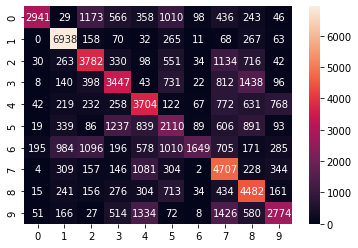

In [ ]:
m_acc=[]
m_acc.append(test(20))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Accuracy score for 50 iterations:  0.5999427999428
Report for 50 iterations:                precision    recall  f1-score   support

           0       0.79      0.80      0.79      6889
           1       0.68      0.96      0.80      7871
           2       0.51      0.66      0.57      6980
           3       0.57      0.40      0.47      7136
           4       0.62      0.59      0.61      6818
           5       0.45      0.45      0.45      6308
           6       0.62      0.42      0.50      6869
           7       0.66      0.64      0.65      7287
           8       0.45      0.51      0.48      6818
           9       0.65      0.51      0.57      6954

    accuracy                           0.60     69930
   macro avg       0.60      0.59      0.59     69930
weighted avg       0.60      0.60      0.59     69930



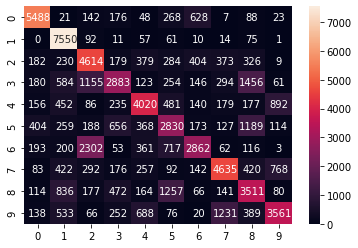

In [ ]:
m_acc.append(test(50))

Accuracy score for 100 iterations:  0.5226941226941227
Report for 100 iterations:                precision    recall  f1-score   support

           0       0.66      0.88      0.75      6892
           1       0.66      0.96      0.78      7868
           2       0.39      0.59      0.47      6981
           3       0.65      0.44      0.53      7136
           4       0.65      0.66      0.66      6814
           5       0.51      0.18      0.27      6309
           6       0.57      0.23      0.32      6873
           7       0.33      0.47      0.39      7287
           8       0.41      0.54      0.47      6816
           9       0.49      0.19      0.28      6954

    accuracy                           0.52     69930
   macro avg       0.53      0.51      0.49     69930
weighted avg       0.53      0.52      0.50     69930



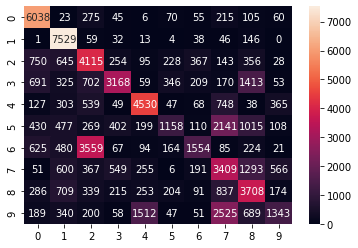

In [ ]:
m_acc.append(test(100))

Accuracy score for 150 iterations:  0.5812812812812813
Report for 150 iterations:                precision    recall  f1-score   support

           0       0.55      0.71      0.62      6895
           1       0.73      0.85      0.79      7872
           2       0.65      0.51      0.57      6985
           3       0.48      0.65      0.55      7130
           4       0.53      0.33      0.41      6820
           5       0.58      0.22      0.32      6308
           6       0.81      0.63      0.71      6870
           7       0.67      0.67      0.67      7284
           8       0.47      0.69      0.56      6815
           9       0.45      0.49      0.47      6951

    accuracy                           0.58     69930
   macro avg       0.59      0.57      0.57     69930
weighted avg       0.59      0.58      0.57     69930



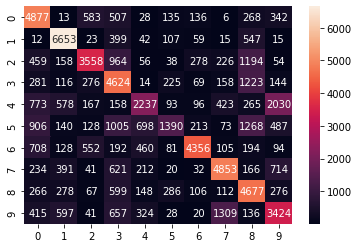

In [ ]:
m_acc.append(test(150))

Accuracy score for 200 iterations:  0.598012298012298
Report for 200 iterations:                precision    recall  f1-score   support

           0       0.76      0.76      0.76      6897
           1       0.60      0.95      0.74      7868
           2       0.77      0.36      0.49      6981
           3       0.52      0.71      0.60      7134
           4       0.60      0.62      0.61      6818
           5       0.49      0.28      0.36      6309
           6       0.48      0.66      0.55      6871
           7       0.65      0.73      0.69      7280
           8       0.66      0.37      0.47      6819
           9       0.58      0.44      0.50      6953

    accuracy                           0.60     69930
   macro avg       0.61      0.59      0.58     69930
weighted avg       0.61      0.60      0.58     69930



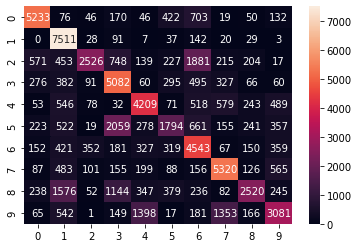

In [ ]:
m_acc.append(test(200))

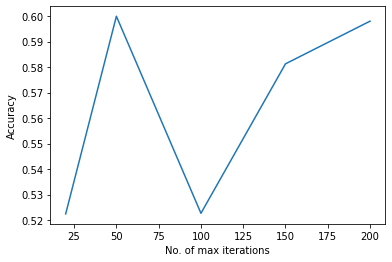

In [ ]:
X_axis2= np.array([20, 50, 100, 150, 200])
Y_axis2= np.array(m_acc)

plt.plot(X_axis2, Y_axis2)
plt.xlabel("No. of max iterations")
plt.ylabel("Accuracy")
plt.show()